# Week 10: Independent Lab
Author: Jen Estes \
Course: BGEN 632 - Introduction to Python \
Term: Spring 2025 \
Due Date: May 7th, 2025 

This notebook contains code for the inspection and organization of data based on the requirements outlined by Dr. Newton in the BGEN632 Week 10 GitHub repo. While using data from survey responses of 61 randomly selected hospitals in California, this program builds *classification* trees and *regression* trees for the target response variables. 

### Importing Modules
----

In [92]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

### Set Working Directory

In [95]:
# set working directory
os.chdir("/Users/jenestes/Desktop/week10labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'/Users/jenestes/Desktop/week10labs/data'

### Load Data

In [98]:
# Load Data 
# Hospital Data
hospital_data = pd.read_csv("calihospital.txt", delimiter = "\t")
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

In [100]:
# inspect data, first 10 rows
hospital_data.head(10)

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.21860,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.69130,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.25410,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.37980,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.83060,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
5,17741,St. Elizabeth Community Hospital,96080,redbluff.mercy.org/index.htm,Non Profit,Small/Rural,Charity,397.5,232503.01910,3.668289e+07,...,66,363672,Marlin,Bill,M,4,Safety Inspection Member,23987,2,1/1/2011
6,20277,Ukiah Valley Medical Center,95482,www.uvmc.org,Non Profit,Small/Rural,Charity,503.5,214516.44810,3.270922e+07,...,65,398103,Johanson,Sandy,F,1,Regional Representative,46978,4,1/1/2012
7,45736,Mountains Community Hospital,92352,www.mchcares.com,District,Small/Rural,Charity,158.0,30786.19672,5.733927e+06,...,35,721586,Web,David,M,2,State Board Representative,89473,3,1/1/2011
8,29823,Colusa Regional Medical Center,95932-2954,www.colusamedicalcenter.org,Non Profit,Small/Rural,Charity,168.0,51726.49180,9.022366e+06,...,48,768057,Tanner,Patricia,F,3,Acting Director,248904,8,1/1/2009
9,13738,St. Mary Medical Center,92307-2206,www.stmary4health.com,Non Profit,Small/Rural,Charity,1216.0,540975.11750,1.251283e+08,...,186,229849,Milgrom,Patricia,F,4,Safety Inspection Member,23987,2,1/1/2011


In [102]:
# selecting numeric columns
num_data = hospital_data.iloc[:, [7,8,9,10,11,12,13]]
num_data.info

<bound method DataFrame.info of      NoFTE     NetPatRev     InOperExp    OutOperExp     OperRev    OperInc  \
0    327.0  1.355202e+05  2.052343e+07  3.491622e+07    49933713   -5505933   
1    345.0  1.361567e+05  3.344754e+07  2.034860e+07    53351748    -444391   
2    601.2  1.970943e+05  3.725418e+07  3.783245e+07    72933707   -2152920   
3    400.0  1.391704e+05  2.338557e+07  2.466136e+07    51087341    3040415   
4    262.0  1.167978e+05  1.368450e+07  1.515999e+07    42845642   14001153   
..     ...           ...           ...           ...         ...        ...   
56  2814.0  1.321032e+06  3.791029e+08  1.064302e+08   491523782    5990693   
57  5218.0  1.187022e+06  2.912481e+08  1.093286e+08   439084836   38508125   
58  6392.0  4.333934e+06  9.289621e+08  6.621559e+08  1650391999   59273999   
59  1565.1  2.736281e+06  6.337903e+08  2.960207e+08  1074256998  144445998   
60  8000.0  4.662582e+06  1.285631e+09  4.616758e+08  1912179417  164872413   

    AvlBeds  
0    

In [104]:
# correlation matrix for numerical data
num_data.corr()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
NoFTE,1.000000,0.903827,0.938051,0.880295,0.896387,-0.072314,0.881333
NetPatRev,0.903827,1.000000,0.979109,0.960232,0.998765,0.220149,0.887727
InOperExp,0.938051,0.979109,1.000000,0.935863,0.979817,0.071781,0.925521
OutOperExp,0.880295,0.960232,0.935863,1.000000,0.955239,0.056218,0.826892
OperRev,0.896387,0.998765,0.979817,0.955239,1.000000,0.234270,0.890018
OperInc,-0.072314,0.220149,0.071781,0.056218,0.234270,1.000000,0.041857
AvlBeds,0.881333,0.887727,0.925521,0.826892,0.890018,0.041857,1.000000


### Target Variable 1: `operating income`
This section of my program creates a tree for the target variable `operating income`, which is a regression tree because this variable is numerical. I include all of the variables in this model becuase there are no numerical variables with a high correlation with this one.

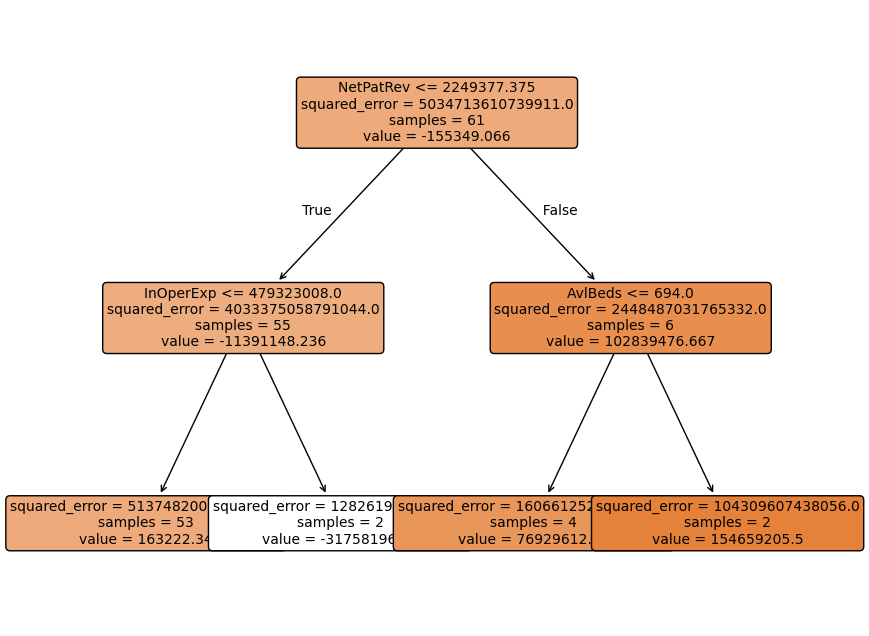

In [119]:
# subset numerical variables
hosp_sub_1 = (hospital_data
             .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables 
hosp_dummy = (hospital_data
              .filter(['TypeControl', 'Teaching', 'DonorType'])
             )

# convert categorical variable into dummy/indicator variables - we will use this DataFrame for several tree builds
dummies = pd.get_dummies(hosp_dummy, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_1 = pd.merge(hosp_sub_1, dummies, left_index=True, right_index=True)

# create the tree - note this is a REGRESSION tree
tree_1 = tree.DecisionTreeRegressor(max_depth=2).fit(tree_data_1, hospital_data['OperInc'])

# create labels for plot
col_names1 = list(tree_data_1.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_1, feature_names=col_names1, filled=True, rounded=True, fontsize=10)
plt.show()

The results from the tree above make sense for our target variable of operating income considering the first split comes from net patient revenue, as the more revenue a hospital earns from patients, the greater the income of that hospital overall. It also makes sense that the next splits come from the inpatient operating costs and available beds, as both of these variables contribute largely to the total income of a hospital. 

### Target Variable 2: `operating revenue`
This section of my program creates a tree for the target variable `operating revenue`, which is a regression tree because this variable is numerical. Since the variables `NetPatRev` and `OperInc` are highly correlated with `OperRev`, we remove them from the model. We can see this from the correlation matrix results and prior decision tree. 

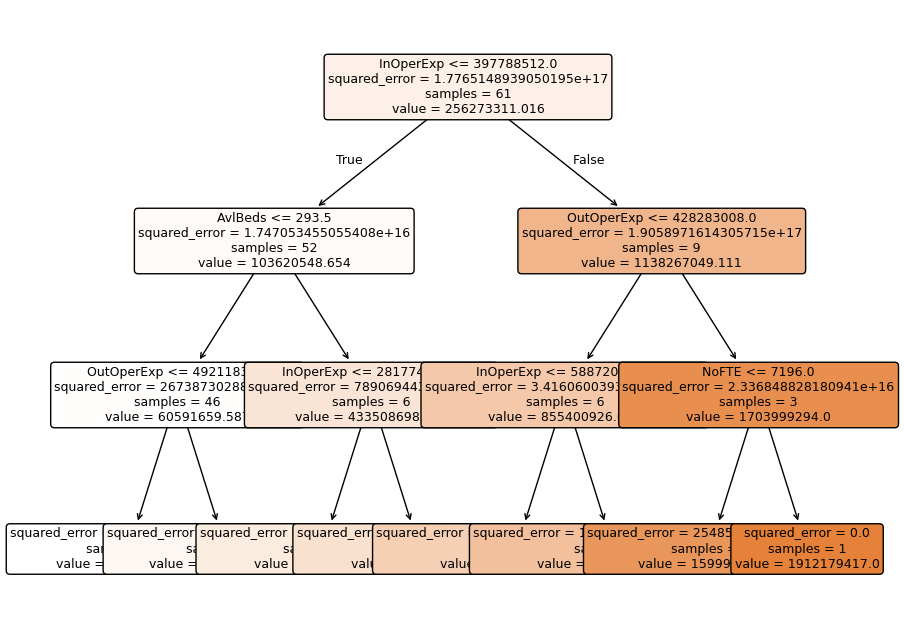

In [52]:
# subset numerical variables
hosp_sub_2 = (hospital_data
            .filter(['NoFTE', 'InOperExp', 'OutOperExp', 'AvlBeds'])
           )

# merge numerical and dummy-coded categorical variables
tree_data_2 = pd.merge(hosp_sub_2, dummies, left_index=True, right_index=True)

# create tree - note this is a REGRESSION tree
tree_2 = tree.DecisionTreeRegressor(max_depth=3).fit(tree_data_2,hospital_data['OperRev'])

# get labels for plot
col_names2 = list(tree_data_2.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_2, feature_names=col_names2, filled=True, rounded=True, fontsize=9)
plt.show()

The results from the tree above show that many of the numerical variables are influential in determining the operating revenue for a hospital. In fact, when the code cell above is run multiple times, the splits may change because of how closely related they are. However, it is clear that the inpatient and outpatient operating expenses and available beds are very significant because the more costs and fewer beds available, the more patients and operating revenue should be brought in. 

### Target Variable 3: `TypeControl`
This section of my program creates a tree for the target variable `TypeControl`, which is a classification tree since this variable is categorical. There is not a concern with high correlation due to this variable not being numerical, so all variables are included to create the tree. 

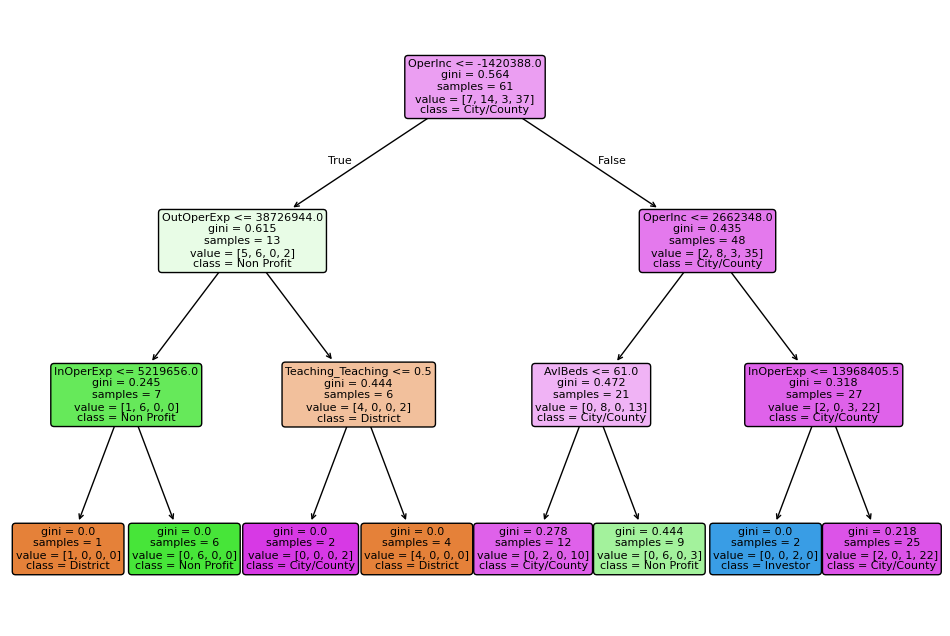

In [63]:
# subset numerical variables
hosp_sub_3 = (hospital_data
.filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'])
)

# subset categorical variables other than TypeControl
hosp_dummy2 = (hospital_data
               .filter(['Teaching', 'DonorType'])
              )

# convert categorical to dummy 
dummies2 = pd.get_dummies(hosp_dummy2,drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_3 = pd.merge(hosp_sub_3, dummies2, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_3 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_3, hospital_data['TypeControl'])

# create labels for plot
col_names3 = list(tree_data_3.columns.values)
classnames1 = list(hospital_data.TypeControl.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_3, feature_names=col_names3, class_names=classnames1, filled=True, rounded=True, fontsize=8)
plt.show()

The results from the classification tree above provide insight to the variables related to the  primary managing entity of the hospital. The first split comes from the variable operating income, which makes sense considering the income and type of hospital are highly related. Additionally, other variables such as outpatient and inpatient operating expenses, whether the hospital is a teaching hospital, and the number of available beds are also influential in this relationship. 

### Target Variable 4: `DonorType`
This section of my program creates a tree for the target variable `DonorType`, which is a classification tree since this variable is categorical. Again, we can use all of the numerical variables to create this tree.

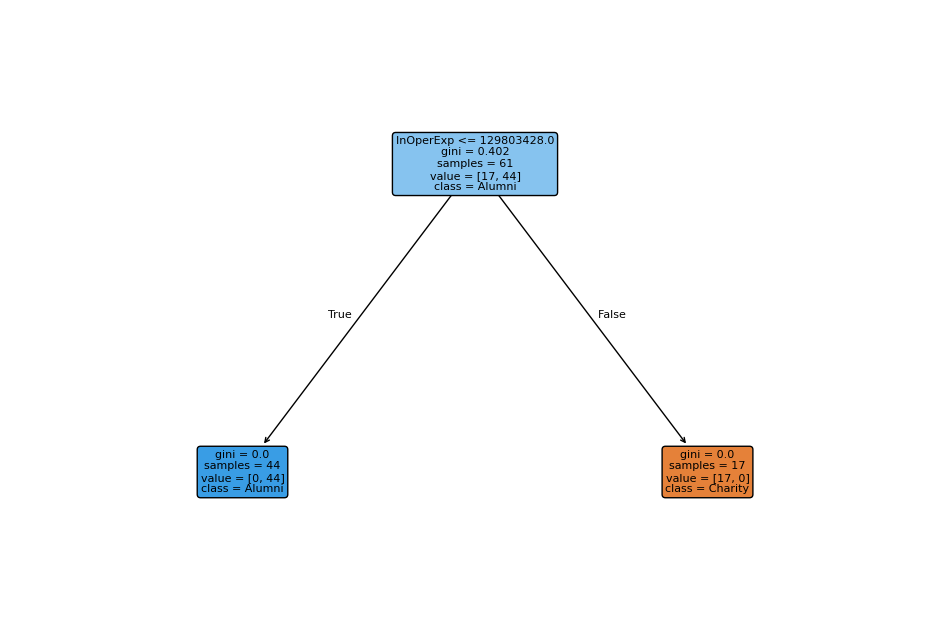

In [74]:
# subset numerical data
hosp_sub_4 = (hospital_data
             .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables other than DonorType
hosp_dummy3 = (hospital_data
               .filter(['Teaching', 'TypeControl'])
              )

# convert categorical variable into dummy/indicator variables
dummies3 = pd.get_dummies(hosp_dummy3, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_4 = pd.merge(hosp_sub_4, dummies3, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_4 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_4, hospital_data['DonorType'])

# create labels for plot
col_names4 = list(tree_data_4.columns.values)
classnames2 = list(hospital_data.DonorType.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_4, feature_names=col_names4, class_names=classnames2, filled=True, rounded=True, fontsize=8)
plt.show()

The results from the classification tree above show that the variable donor type is highly influenced by the inpatient operating expenses. This makes sense as we think about the most prominent group of donors potentially having an influence on patients being taken care of in a hospital and what funds are used to expense their inpatient care. 

### Best Model
In terms of which tree I would select as my best model, usually we can provide a more objective assessment of this through precise and accurate calculations and tests on each model, but with a small data set of only 61 samples (hospitals), my assessment is more subjective in nature. Personally, I like the model that looks at operating income because I think this tree provides important insight for a hospital that might be overlooked or not seen from a basic correlation matrix. I like that this model is a regression tree that uses all the numerical variables and none had to be removed due to high correlation values. This variable does not have high correlation to many variables, but our decision tree is able to highlight important variables that contribute to operating income, so I think it would be helpful to use in analysis and strategic decision-making. 

### Lab Complete!